In [1]:
import pandas as pd
import numpy as np
import chardet
# i use character detection , because we have some latin characters in it .
# Detect the encoding
with open("/spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# Read the CSV file using the detected encoding
df = pd.read_csv("/spam.csv", encoding=result['encoding'])

**WE ARE GOING TO BUILD THIS MODE THROUGH " NAIVE BAYES " because it performs well on textuals data **

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.shape

(5572, 5)

In [5]:
#Cleaning data
#EDA
#Text Preprocessing
#Model building
#Evaluation
#improvement
#into website
#deployment

**1.Data Cleaning**

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3',	'Unnamed: 4'], inplace=True)

In [7]:
df.shape

(5572, 2)

In [8]:
df.rename(columns={"v1":"target", "v2":"Message"}, inplace=True)

In [9]:
df.head(10)

,target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
df.describe()

,target,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df['target']=df['target'].apply(lambda x:1 if x=='spam' else 0)
# you can use here LabelEncoder() , instead of ths method, in order ton convert into 1,0

In [12]:
df.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking for null
df.isnull().sum()

,0
target,0
Message,0


In [14]:
#cheching for duplicates
df.duplicated().sum()

403

In [15]:
#Lets remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

**2.EDA**

In [18]:
import matplotlib.pyplot as plt

In [19]:
# I want to check how many spam and ham sms i have

In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


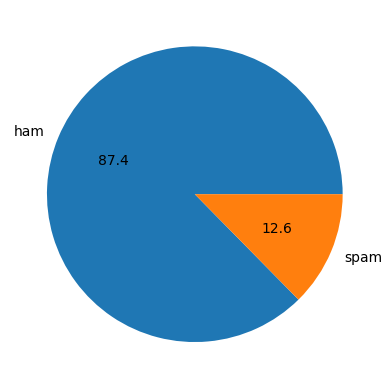

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.1f")
plt.show()

In [22]:
# it means data is imbalance, by considering spam and ham numbers

In [23]:
# next we are going to find how many 1.letters, 2.words,3.sentences are being used in a message,
# we are going to do this with the Help of NLP,its library called, nltk

In [24]:
import nltk

In [25]:
nltk.download('punkt')
nltk.download('punkt_tab')
# its is necessary to use nltk depenencies

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['Message'].apply(len)

,Message
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [27]:
#finding number of characters/letters
df['num_character']=df['Message'].apply(len)
#(spaces al included)

In [28]:
df.head()

,target,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#finding number f words using nltk

df['Message'].apply(lambda x:nltk.word_tokenize(x))

,Message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [30]:
df['num_words']=df['Message'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
df['num_words']

,num_words
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [31]:
# same for getting sentences
df['num_sentences']= df['Message'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)
df['num_sentences']

,num_sentences
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [32]:
df.head()

,target,Message,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
import seaborn as sns

In [34]:
df[df['target']==0]['num_character']

,num_character
0,111
1,29
3,49
4,61
6,77
...,...
5565,12
5568,37
5569,57
5570,125


In [35]:
df[df['target']==1]['num_character']

,num_character
2,155
5,148
8,158
9,154
11,136
...,...
5537,90
5540,160
5547,160
5566,147


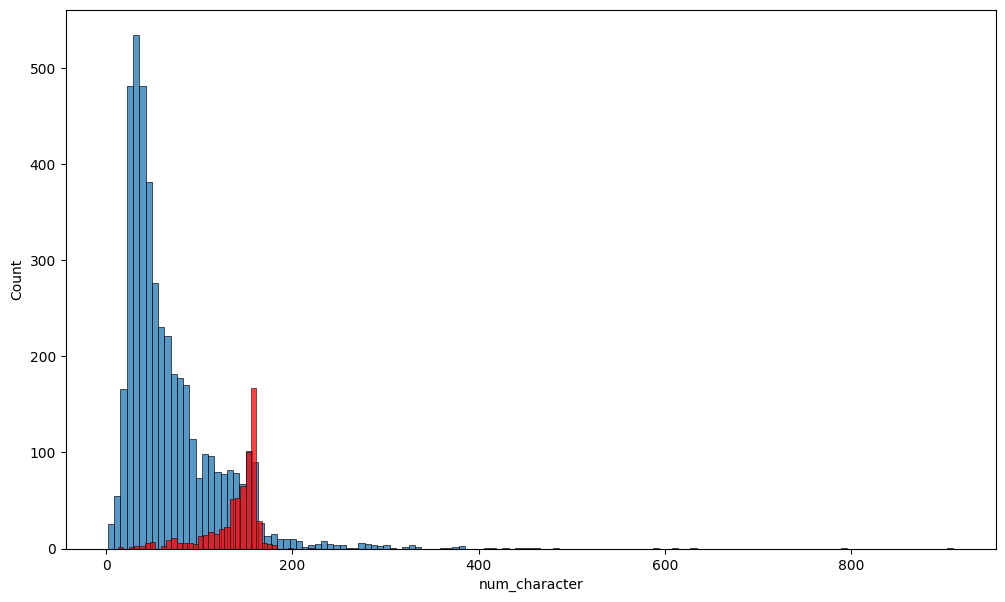

In [36]:
# visualizing this with the help of histogram plot
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'], color='red')
plt.show()
# as we can see,spam=1 messages are made from more characters, even though having less in number

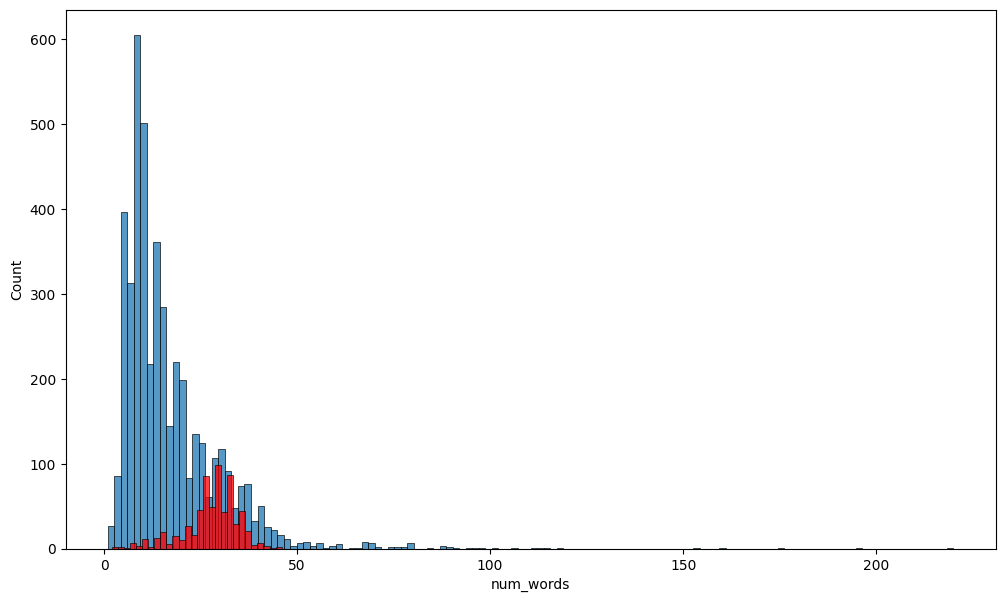

In [37]:
# checking same for number of character

# visualizing this with the help of histogram plot
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')
plt.show()
# here we see ham words contain more as compared to spam messages

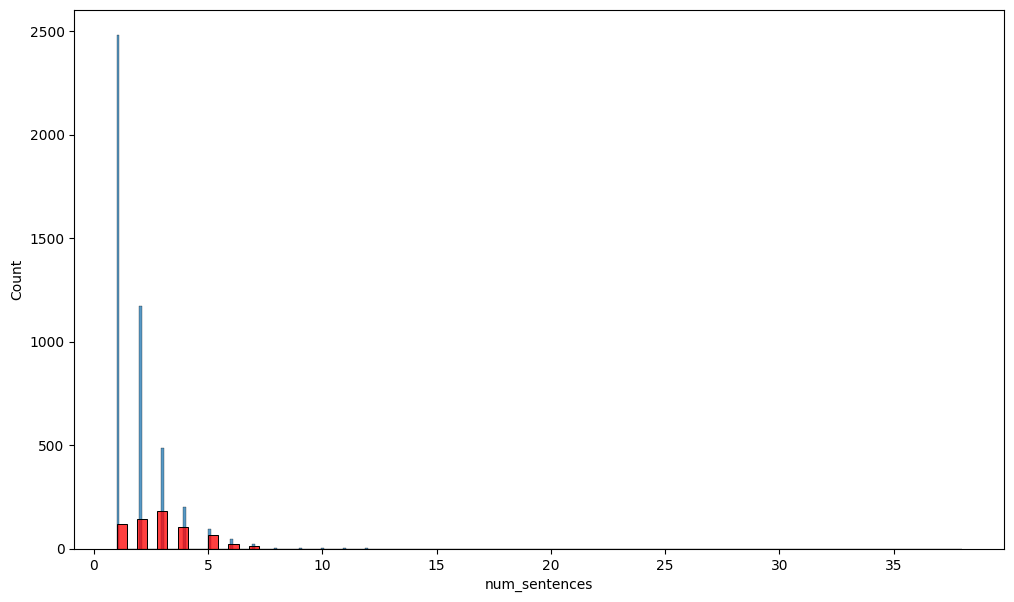

In [38]:
# checking same for number of character

# visualizing this with the help of histogram plot
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')
plt.show()


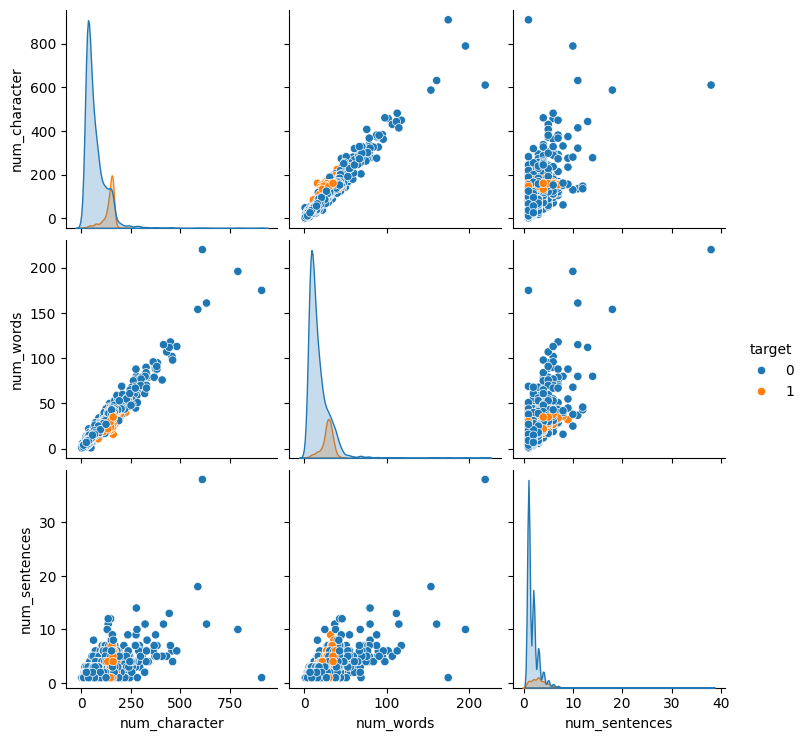

In [39]:
# seeing their relation

sns.pairplot(df , hue='target')
plt.show()

In [40]:
# we are going to take one column for model building that is num_character

**3. Text Preprocessing**


1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming **bold text**


In [41]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')  # words which do not convey much meaning in a sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation        # these are punctuational words

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
# Special characters are symbols or punctuation marks that are not letters or numbers.
# Punctuation marks like periods, commas, and question marks
# Symbols like dollar signs, percentage signs, and ampersands

In [44]:
# stemming refers to; dance, danced, dancing like words
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [45]:
def transform_text(text):
  # for lower case
  text=text.lower()

  # tokenizztion
  text=nltk.word_tokenize(text)

  # Leaving just alpha numeric  characters
  y=[]
  for i in   text:
    if i.isalnum():
      y.append(i)

  # removing special char and punctuations
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # removing stemming words
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(ps.stem(i))

  return " ".join(y)

In [46]:
transform_text('I Loved to watch Machine Learning lectures on Yt. What about You, Lad ?')

'love watch machin learn lectur yt lad'

In [47]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
df['Message'].apply(transform_text)  # transformed all messeges

,Message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [50]:
df["transformed_text"]=df['Message'].apply(transform_text)

In [51]:
df.head(10)

,target,Message,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [52]:
# generating word cloud of spam messages

In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=1000, height=1000, min_font_size=10,  background_color='black')

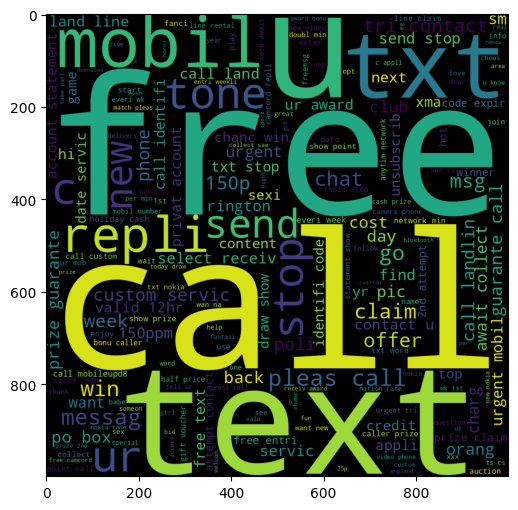

In [54]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(11,6))
plt.imshow(spam_wc)
# it shows the important words in spam

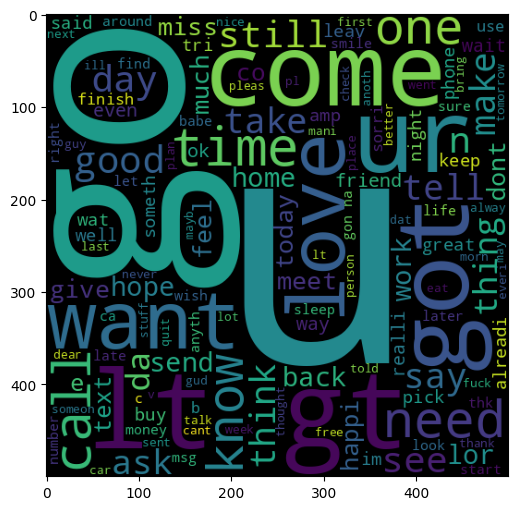

In [55]:
wc=WordCloud(height=500, width=500 , min_font_size=13, background_color='black')
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)
plt.show()

In [56]:
# top 30 words of spam and ham messages

In [57]:
# top 30 most occuring  spam messages

from collections import Counter

spam_words = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ").split()
spam_word_counts = Counter(spam_words)
top_30_spam = spam_word_counts.most_common(30)

pd.DataFrame(top_30_spam)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [58]:
# Top 30 most occuring ham mesges

ham_msg=df[df['target']==0]['transformed_text'].str.cat(sep=" ").split()
word_count=Counter(ham_msg)
top_30_ham=word_count.most_common(30)
pd.DataFrame(top_30_ham)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


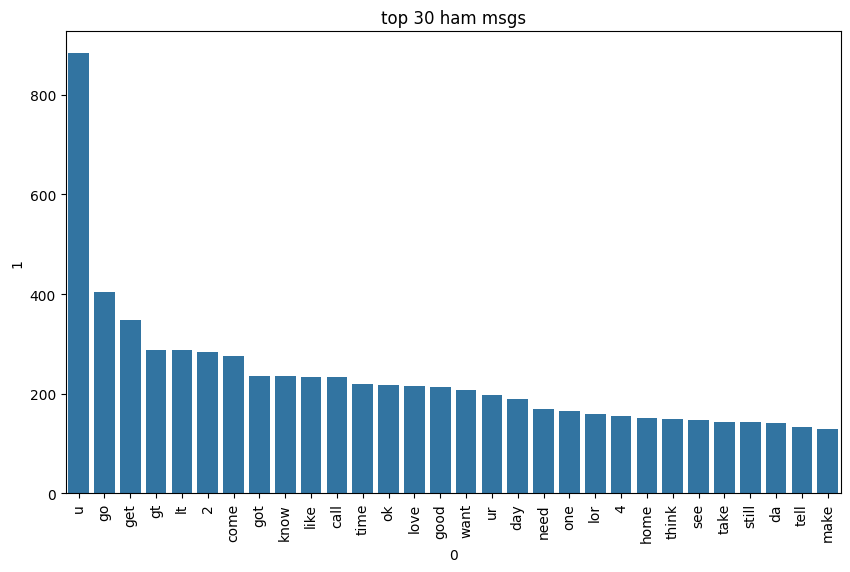

In [59]:
# ploting the top30 spam

x_ham=pd.DataFrame(top_30_ham)
plt.figure(figsize=(10,6))
sns.barplot(x=x_ham[0] , y=x_ham[1]) # x_ham=text[0], u,go etc. ..........x_ham[1]=numbers , 1, 883 etc.
plt.xticks(rotation="vertical")
plt.title("top 30 ham msgs")
plt.show()

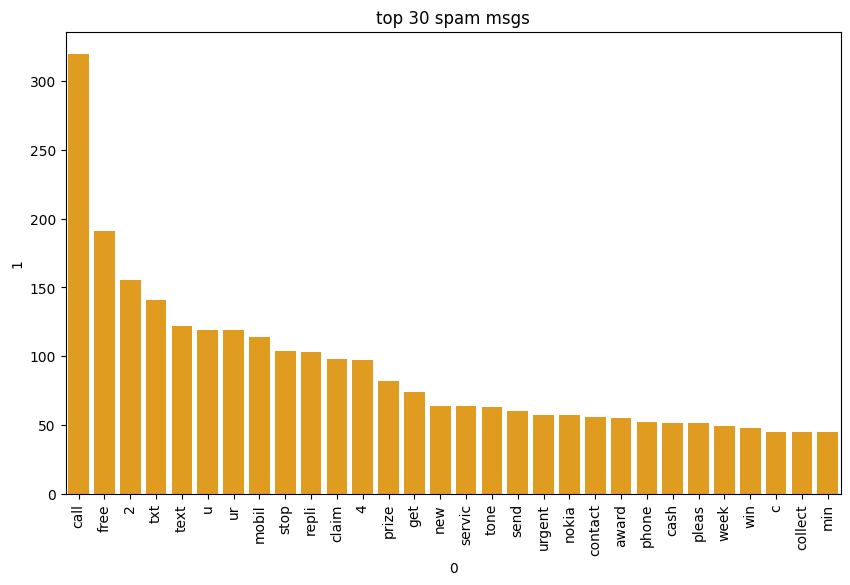

In [60]:
# Ploting top 30 spam msgs
plt.figure(figsize=(10,6))
x_spam=pd.DataFrame(top_30_spam)
sns.barplot(x=x_spam[0], y=x_spam[1] , color='orange')
plt.xticks(rotation="vertical")
plt.title("top 30 spam msgs")
plt.show()

# MODEL BUILDING

**NAIVE BAYES:** For Naive Bayes, first we have to convert text into numeric for , Beacuse it takes numeric input

In [61]:
# 1. Vectorizing text, through bag of words
# 2. model training
# 3. model evaluation

In [62]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split


In [63]:
cv=CountVectorizer()

In [64]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [65]:
X  #independent variable in an array format

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
X.shape

(5169, 6708)

In [67]:
y=df['target'].values

In [68]:
y    #dependent variable in an array format as well

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [70]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB  # Model training using NAive Bayes
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [71]:
# creating objects for these3
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

**TRAINING WITH MULTINOMIALNM**

In [72]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [73]:
y_pred1=mnb.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

**ACCURACY SCORE**

In [74]:
print("Accuracy score of MNB:",accuracy_score(y_test,y_pred1))
print("confusion metrics score of MNB:",confusion_matrix(y_test,y_pred1))
print("precision score of MNB:",precision_score(y_test,y_pred1))

Accuracy score of MNB: 0.9642166344294004
confusion metrics score of MNB: [[871  25]
 [ 12 126]]
precision score of MNB: 0.8344370860927153


**Gaussian NB Model training**

In [75]:
gnb.fit(X_train, y_train)
y_pred2=gnb.predict(X_test)

Accuracy score

In [76]:
print("Accuracy score of GNB:",accuracy_score(y_test,y_pred2))
print("confusion metrics score of GNB:",confusion_matrix(y_test,y_pred2))
print("precision score of GNB:",precision_score(y_test,y_pred2))

Accuracy score of GNB: 0.8800773694390716
confusion metrics score of GNB: [[792 104]
 [ 20 118]]
precision score of GNB: 0.5315315315315315


BINOMIAL NB RAINING

In [77]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

**ACCURACY Score**

In [78]:
print("Accuracy score of BNB:",accuracy_score(y_test,y_pred3))
print("confusion metrics score of BNB:",confusion_matrix(y_test,y_pred3))
print("precision score of BNB:",precision_score(y_test,y_pred3))    # its performance look well

Accuracy score of BNB: 0.9700193423597679
confusion metrics score of BNB: [[893   3]
 [ 28 110]]
precision score of BNB: 0.9734513274336283


NOW LETS CHECCK TFIDFVECTORIZER, INSTEAD OF COUNTVECTORIZER, THEN AGAIN WILL SE THE PERFORMANCE

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tfidf= TfidfVectorizer(max_features=3000)  # i take mostly used words in the corpus

In [81]:
X_2=tfidf.fit_transform(df['transformed_text']).toarray()

In [82]:
X_2.shape, X.shape

((5169, 3000), (5169, 6708))

In [83]:
x_train, x_test, y_train, y_test=train_test_split(X_2,y, test_size=0.2, random_state=2)

GNB MODEL

In [84]:
gnb.fit(x_train,y_train)
ypred1=gnb.predict(x_test)

**GNB Score**

In [85]:
print("Accuracy score of GNB:",accuracy_score(y_test,ypred1))
print("confusion metrics score of GNB:",confusion_matrix(y_test,ypred1))
print("precision score of GNB:",precision_score(y_test,ypred1))

Accuracy score of GNB: 0.8694390715667312
confusion metrics score of GNB: [[788 108]
 [ 27 111]]
precision score of GNB: 0.5068493150684932


**MNB Model**

In [86]:
mnb.fit(x_train,y_train)
ypred2=mnb.predict(x_test)

**MNB score**

In [87]:
print("Accuracy score of MNB:",accuracy_score(y_test,ypred2))      # Perfect Precuision and accuracy as well
print("confusion metrics score of MNB:",confusion_matrix(y_test,ypred2))
print("precision score of MNB:",precision_score(y_test,ypred2))

Accuracy score of MNB: 0.9709864603481625
confusion metrics score of MNB: [[896   0]
 [ 30 108]]
precision score of MNB: 1.0


**BNB Model**

In [88]:
bnb.fit(x_train, y_train)
ypred3=bnb.predict(x_test)

**BNB SCORE**

In [89]:
print("Accuracy score of BNB:",accuracy_score(y_test,ypred3))
print("confusion metrics score of BNB:",confusion_matrix(y_test,ypred3))
print("precision score of BNB:",precision_score(y_test,ypred3))


Accuracy score of BNB: 0.9835589941972921
confusion metrics score of BNB: [[895   1]
 [ 16 122]]
precision score of BNB: 0.991869918699187


**CH0OSING MULTINOMIAL NB,SUPPORTING TFIFD VECTORIZER**

In [90]:
# tfidf --> MNB

In [91]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


In [92]:

from google.colab import files

# Assuming 'vectorizer.pkl' and 'model.pkl' are in the current working directory
files.download('vectorizer.pkl')
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>